__01. Importing the Libraries__
- We start off this project by importing all the necessary libraries that will be required for the process.

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

__02. Loading the Data__
- Loading the data and removing unnecessary column from the dataframe

In [61]:
df = pd.read_csv("Flight_Booking.csv")
df = df.drop(columns=["Unnamed: 0"])
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


- Checking the __shape__ of a dataframe and __datatypes__ of all columns along with calculating the __statistical data__.

In [62]:
df.shape

(300153, 11)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [64]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


- Checking out the __missing values__ in a dataframe.

In [65]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

__03. Data Visualization__

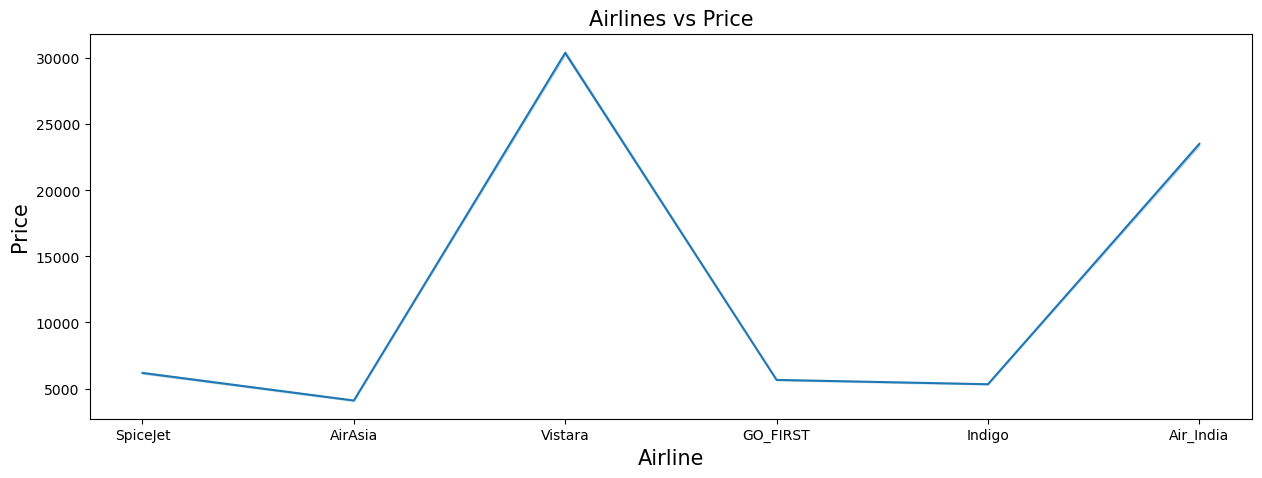

In [66]:
plt.figure(figsize=(15,5))
sns.lineplot(x = df['airline'], y = df['price'])
plt.title('Airlines vs Price', fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

- There is a variation in price with different airlines

<function matplotlib.pyplot.show(close=None, block=None)>

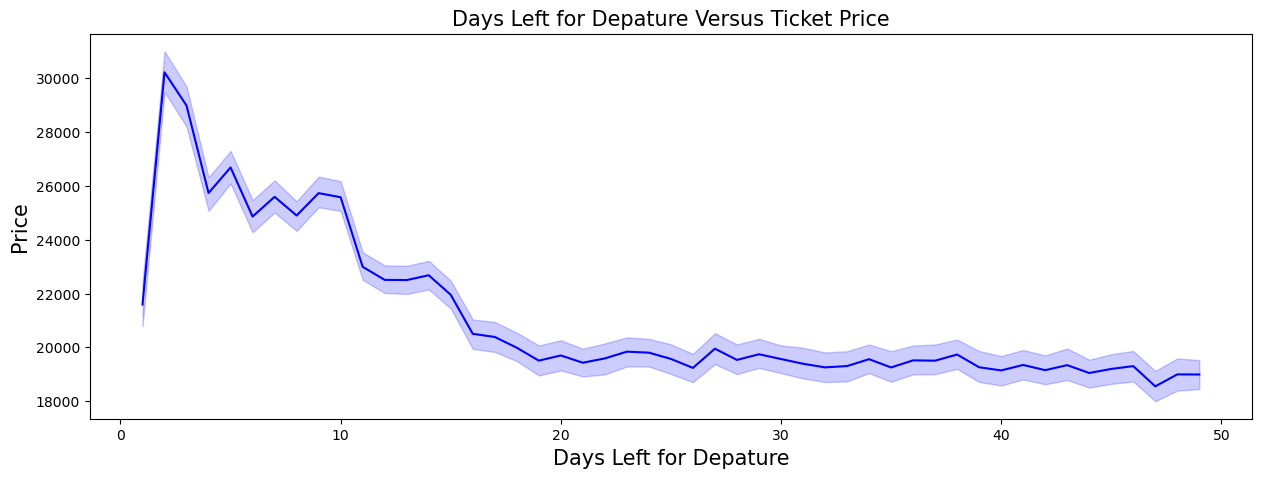

In [67]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df, x='days_left', y='price', color='blue')
plt.title('Days Left for Depature Versus Ticket Price', fontsize=15)
plt.xlabel('Days Left for Depature', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show

- The price of the ticket increases as the days left for departure decreases

<AxesSubplot:xlabel='airline', ylabel='price'>

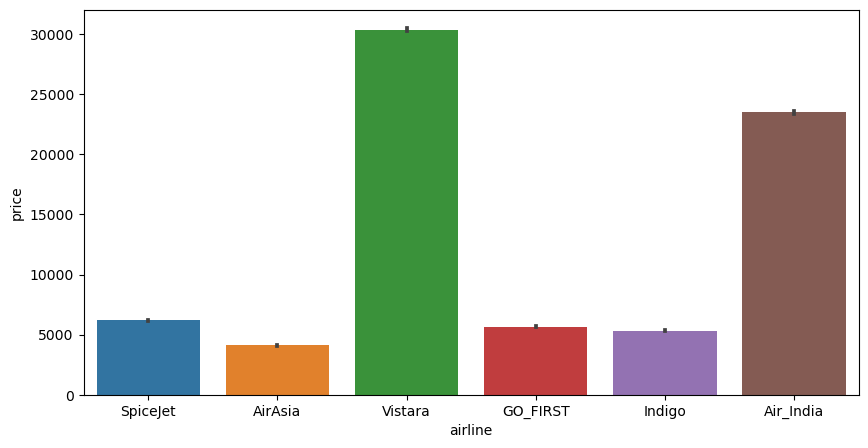

In [68]:
plt.figure(figsize=(10,5))
sns.barplot(x='airline', y='price', data=df)

- Price range of all the flights

<AxesSubplot:xlabel='class', ylabel='price'>

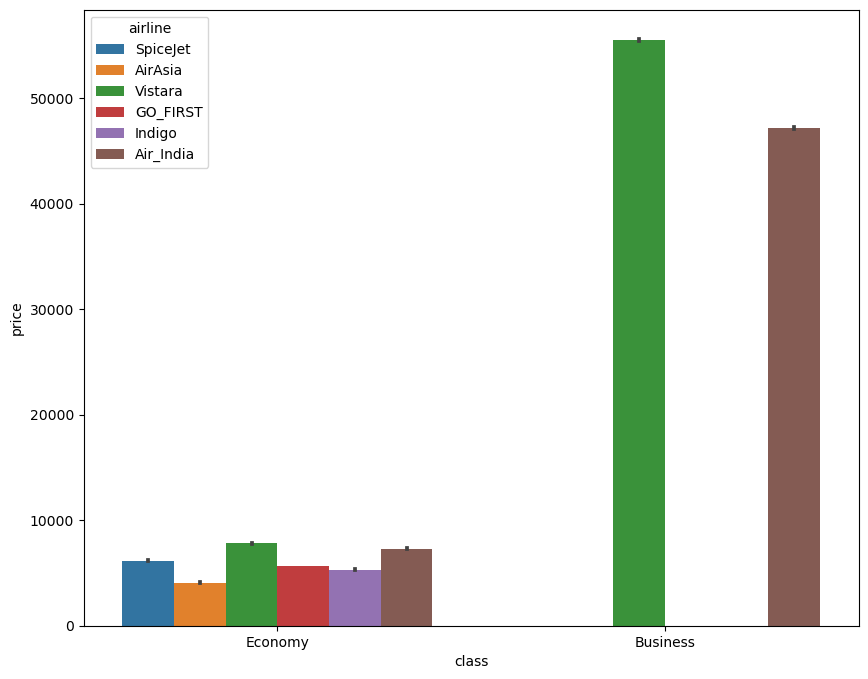

In [69]:
plt.figure(figsize=(10,8))
sns.barplot(x='class', y='price', data=df, hue='airline')

- Range of price of all the flights of Economy and Business class

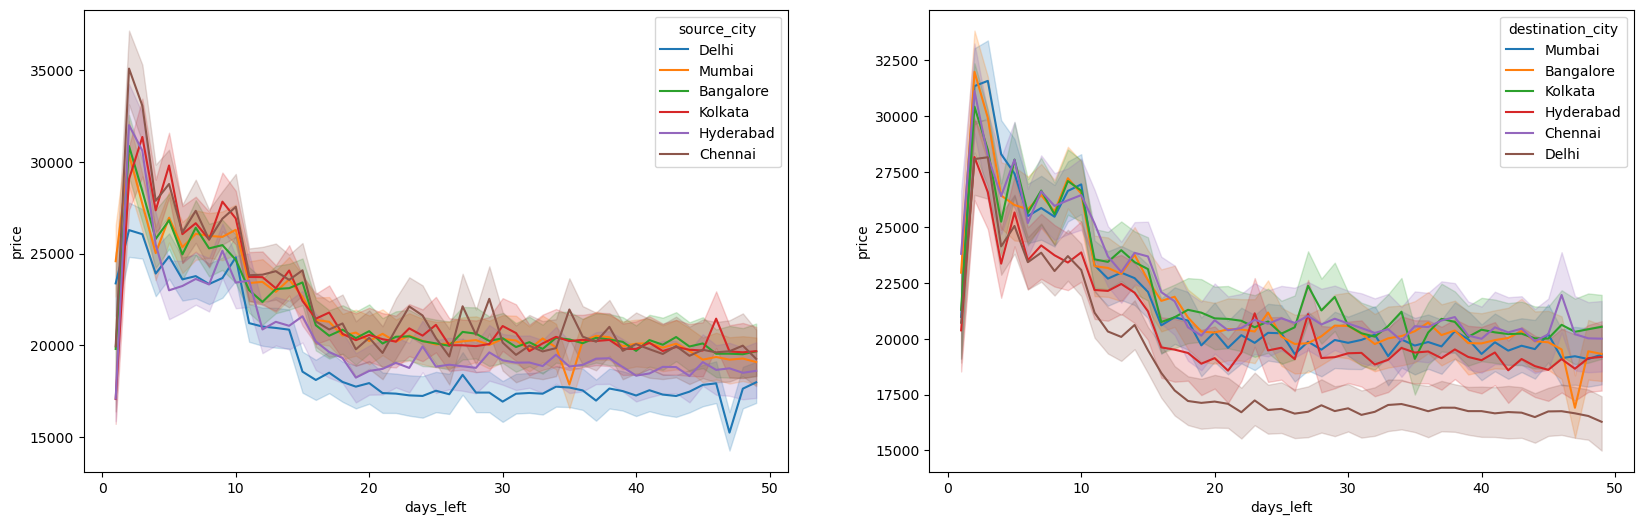

In [70]:
fig,ax=plt.subplots(1,2,figsize=(20,6))
sns.lineplot(x='days_left', y='price', data=df, hue='source_city', ax=ax[0])
sns.lineplot(x='days_left', y='price', data=df, hue='destination_city', ax=ax[1])
plt.show()

- Range of price of flights with source and destination city according to the days left

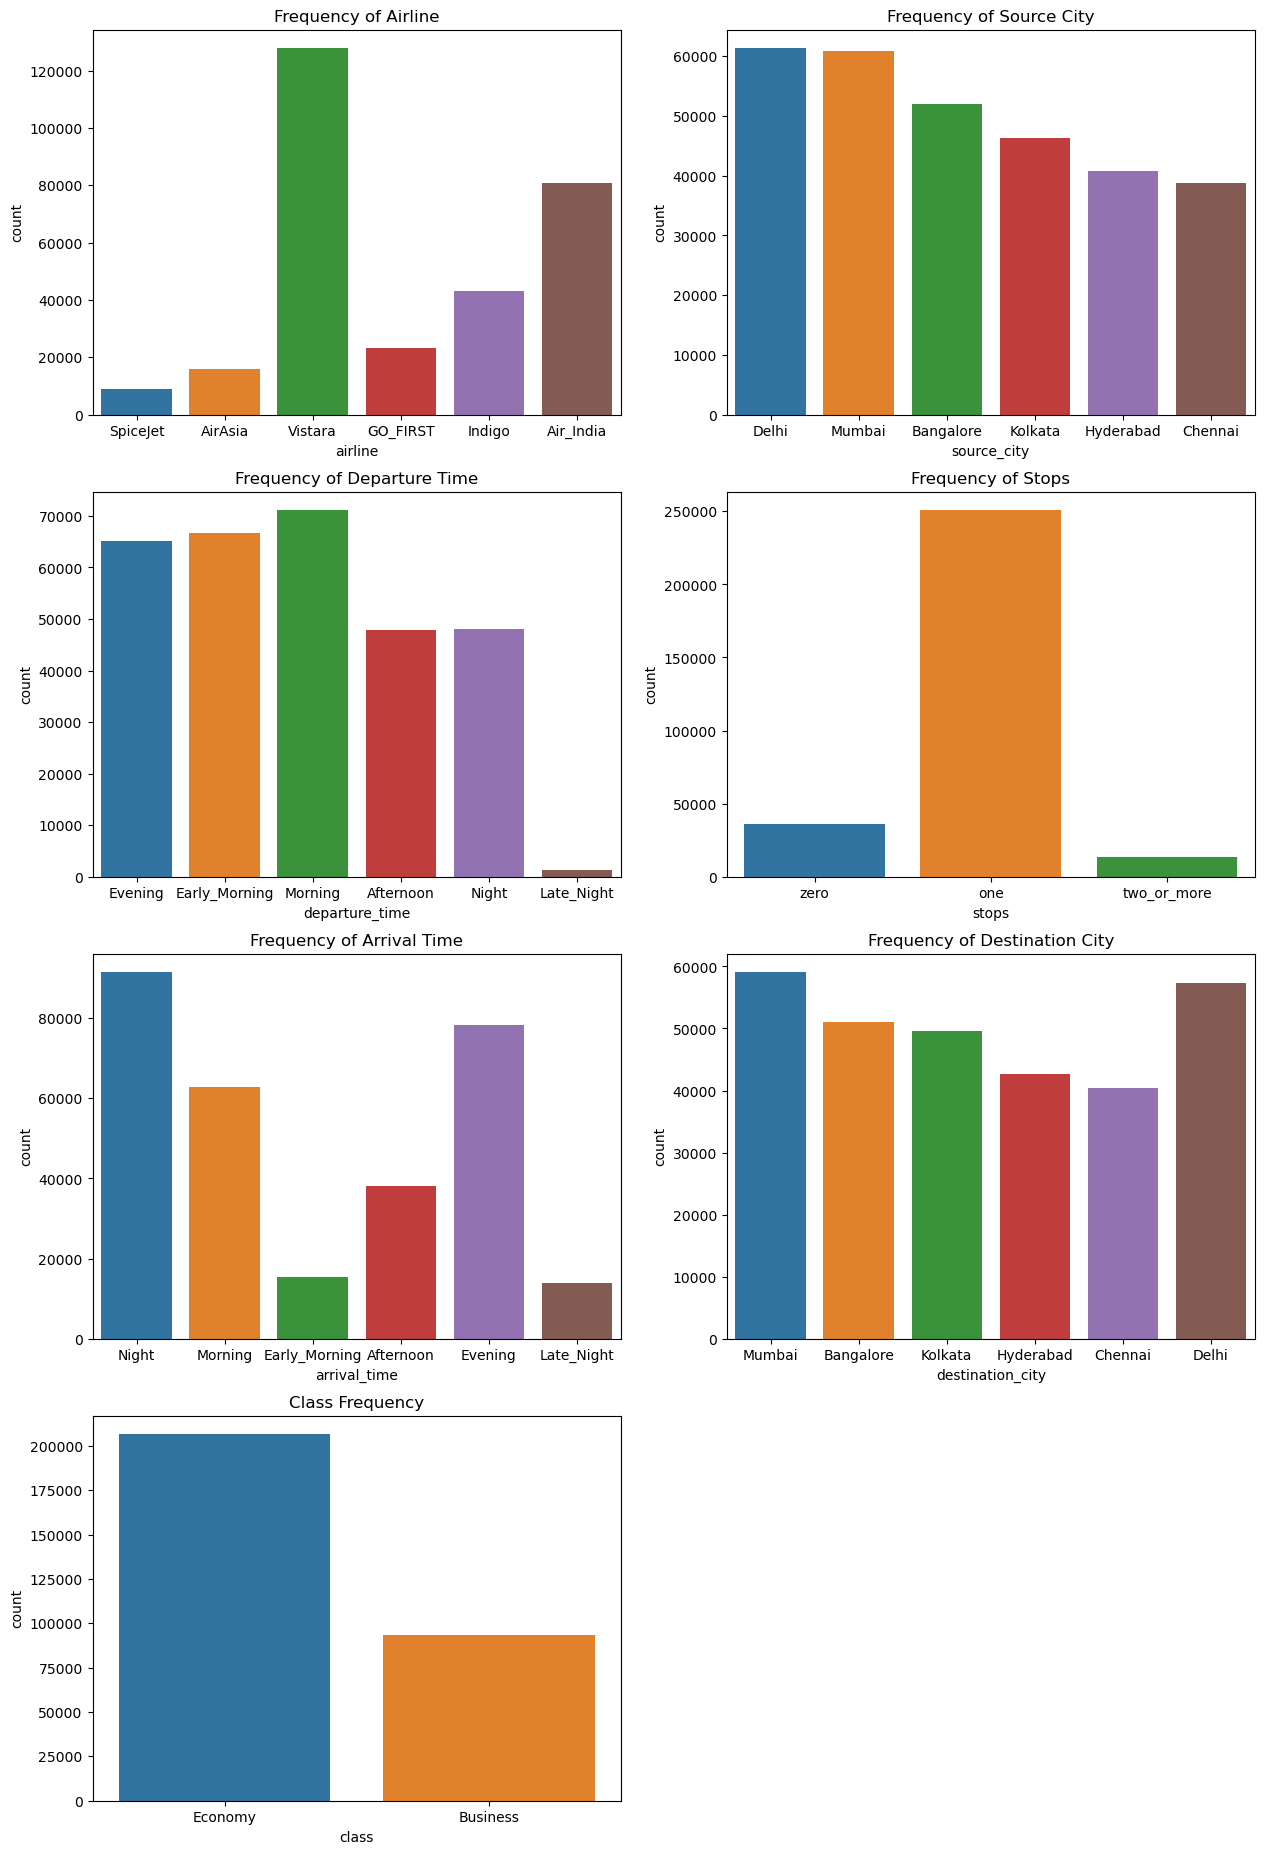

In [71]:
plt.figure(figsize=(15,23))

plt.subplot(4, 2, 1)
sns.countplot(x=df["airline"], data=df) 
plt.title("Frequency of Airline")

plt.subplot(4, 2, 2)
sns.countplot(x=df["source_city"], data=df) 
plt.title("Frequency of Source City")

plt.subplot(4, 2, 3)
sns.countplot(x=df["departure_time"], data=df) 
plt.title("Frequency of Departure Time")

plt.subplot(4, 2, 4)
sns.countplot(x=df["stops"], data=df) 
plt.title("Frequency of Stops")

plt.subplot(4, 2, 5)
sns.countplot(x=df["arrival_time"], data=df) 
plt.title("Frequency of Arrival Time")

plt.subplot(4, 2, 6)
sns.countplot(x=df["destination_city"], data=df) 
plt.title("Frequency of Destination City")

plt.subplot(4, 2, 7)
sns.countplot(x=df["class"], data=df) 
plt.title("Class Frequency")

plt.show()

- Visualization of categorical features with countplot

__04. Label Encoding__
- Performing One Hot Encoding for categorical features of a dataframe

In [72]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder

In [73]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['airline'] = le.fit_transform(df["airline"])
df['flight'] = le.fit_transform(df["flight"])
df['source_city'] = le.fit_transform(df['source_city'])
df['departure_time'] = le.fit_transform(df['departure_time'])
df['stops'] = le.fit_transform(df['stops'])
df['arrival_time'] = le.fit_transform(df['arrival_time'])
df['destination_city'] = le.fit_transform(df['destination_city'])
df['class'] = le.fit_transform(df['class'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            300153 non-null  int32  
 2   source_city       300153 non-null  int32  
 3   departure_time    300153 non-null  int32  
 4   stops             300153 non-null  int32  
 5   arrival_time      300153 non-null  int32  
 6   destination_city  300153 non-null  int32  
 7   class             300153 non-null  int32  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int32(8), int64(2)
memory usage: 16.0 MB


<AxesSubplot:>

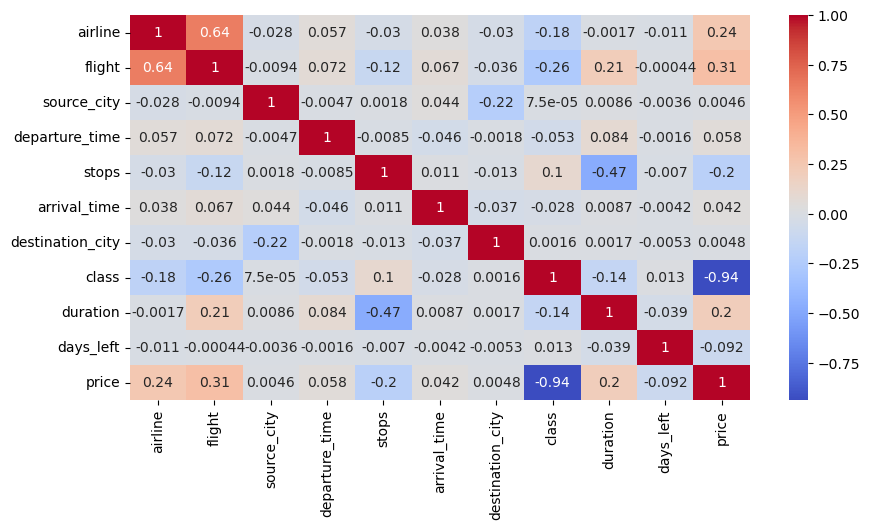

In [74]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

- Plotting the correlation graph to see the correlation between features and dependent variable.

__05. Feature Selection__
- Selecting the features using VIF. VIF should be less than 5. So drop the stops feature.

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'price')):
        col_list.append(col)
        
X = df[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                   for i in range(len(X.columns))]
print(vif_data)

            feature        VIF
0           airline   6.701818
1            flight  12.675046
2       source_city   2.969540
3    departure_time   2.806009
4             stops   1.437326
5      arrival_time   3.784873
6  destination_city   2.918792
7             class   2.852072
8          duration   4.754588
9         days_left   4.071591


__06. Implementing ML Algorithms__

__i. Linear Regression__
- Applying standardization and implementing Linear Regression Model to predict the price of a flight.

In [76]:
X = df.drop(columns=['price'])
y = df['price']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                random_state=42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

difference = pd.DataFrame(np.c_[y_test,y_pred],
                         columns=["Actual_value","Predicted_Value"])
difference

,Actual_value,Predicted_Value
0,7366.0,4567.013416
1,64831.0,52844.339673
2,6195.0,7904.949552
3,60160.0,56121.015486
4,6578.0,6672.773495
...,...,...
60026,5026.0,5824.337078
60027,3001.0,371.004613
60028,6734.0,5843.835285
60029,5082.0,-1684.520514


- Calculating r2 score,MAE, MAPE, MSE, RMSE. Root Mean square error(RMSE) of the Linear regression model is 7259.93 and Mean absolute percentage error(MAPE) is 34 percent. Lower the RMSE and MAPE better the model.

In [77]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

from sklearn import metrics
mean_abs_error = metrics.mean_absolute_error(y_test,y_pred)
print(mean_abs_error)

from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(y_test,y_pred))

mean_sq_error = metrics.mean_squared_error(y_test,y_pred)
print(mean_sq_error)

root_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(root_mean_sq_error)

0.9045747930770208
4622.187103361402
0.434440464002526
49190002.62043741
7013.558484851853


- Plotting the graph of actual and predicted price of flight

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


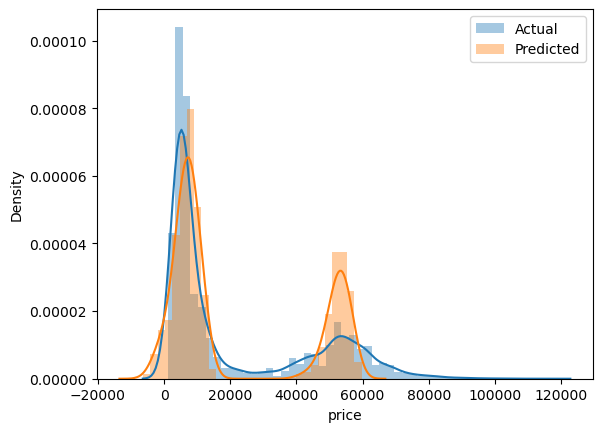

In [78]:
sns.distplot(y_test, label="Actual")
sns.distplot(y_pred,label="Predicted")
plt.legend()

__ii. Decision Tree Regressor__

In [79]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print(r2_score(y_test, y_pred))

mean_abs_error = metrics.mean_absolute_error(y_test,y_pred)
print(mean_abs_error)

from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(y_test, y_pred))

mean_sq_error = metrics.mean_squared_error(y_test,y_pred)
print(mean_sq_error)

root_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(root_mean_sq_error)

0.9827414338719019
894.0074822452845
0.05962666774049278
8896484.90625075
2982.6975888029197


- Mean absolute percentage error is 5.9 percent and RMSE is 2982 which is less than the linear regression and decision tree model

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


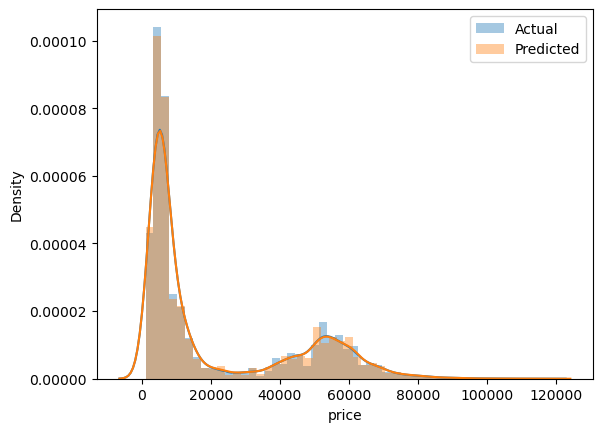

In [80]:
sns.distplot(y_test,label="Actual")
sns.distplot(y_pred,label="Predicted")
plt.legend()